<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/Nhan_Dang_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Flower/Flower_train/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('lotus'):
    output = 0.0
  if file.startswith('Marigold'):
    output = 1.0
  if file.startswith('rose'):
    output = 2.0
  if file.startswith('sunflower'):
    output = 3.0
  if file.startswith('YellowApricotFlower'):
    output = 4.0

  photo = load_img(folder + file, target_size =(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)

(398, 150, 150, 3) (398,)


In [52]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Flower/Flower_test/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('lotus'):
    output = 0.0
  if file.startswith('Marigold'):
    output = 1.0
  if file.startswith('rose'):
    output = 2.0
  if file.startswith('sunflower'):
    output = 3.0
  if file.startswith('YellowApricotFlower'):
    output = 4.0

  photo = load_img(folder + file, target_size =(150,150))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)

(194, 150, 150, 3) (194,)


In [53]:
from keras.utils import  to_categorical

photos_train = photos_train.reshape(398, 150, 150, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(194, 150, 150, 3)
photos_test = photos_test.astype('float32')/255

labels_train = to_categorical(labels_train,5)
labels_test = to_categorical(labels_test,5)

print(photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape)

(398, 150, 150, 3) (398, 5) (194, 150, 150, 3) (194, 5)


In [54]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size = 64
epochs = 70
classes = 5

model = Sequential()
#tich chap 32 lan
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',input_shape = (150,150,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 64 lan
model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 128 lan
model.add(Conv2D(128, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 512 lan
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#tich chap 1024 lan
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))
model.summary() 

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_73 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                

In [55]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy',metrics = ['accuracy'])
train = model.fit(photos_train, labels_train, batch_size = batch_size ,epochs = epochs, verbose = 1)
test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('Do chinh xac', test_acc)
print('Do mat mat', test_loss)

Epoch 1/70
7/7 [==============================] - 1s 91ms/step - loss: 3.1262 - accuracy: 0.2437
Epoch 2/70
7/7 [==============================] - 1s 97ms/step - loss: 1.3888 - accuracy: 0.4070
Epoch 3/70
7/7 [==============================] - 1s 102ms/step - loss: 1.1494 - accuracy: 0.4774
Epoch 4/70
7/7 [==============================] - 1s 94ms/step - loss: 1.3364 - accuracy: 0.5302
Epoch 5/70
7/7 [==============================] - 1s 84ms/step - loss: 1.1985 - accuracy: 0.4975
Epoch 6/70
7/7 [==============================] - 1s 83ms/step - loss: 0.9351 - accuracy: 0.6256
Epoch 7/70
7/7 [==============================] - 1s 83ms/step - loss: 0.7650 - accuracy: 0.6935
Epoch 8/70
7/7 [==============================] - 1s 84ms/step - loss: 0.6853 - accuracy: 0.7186
Epoch 9/70
7/7 [==============================] - 1s 84ms/step - loss: 0.7669 - accuracy: 0.6784
Epoch 10/70
7/7 [==============================] - 1s 84ms/step - loss: 0.7050 - accuracy: 0.7161
Epoch 11/70
7/7 [===========

In [56]:
model.save('drive/MyDrive/Flower/modelNhandangFlower.h5')

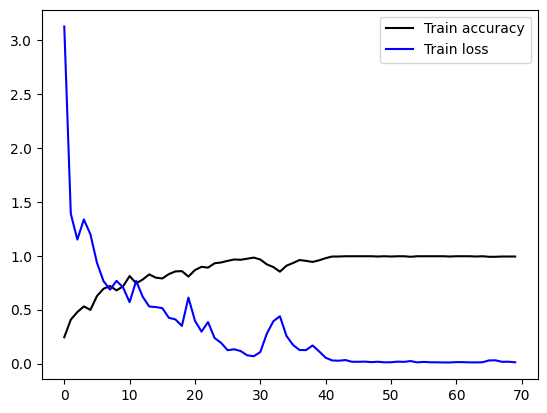

In [57]:
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [71]:
from keras.saving.saving_api import load_model
model10=load_model('drive/MyDrive/Flower/modelNhandangFlower.h5')

1/1 [==============================] - 0s 30ms/step
Giá trị: 0
1/1 [==============================] - 0s 29ms/step
lotus
1/1 [==============================] - 0s 20ms/step


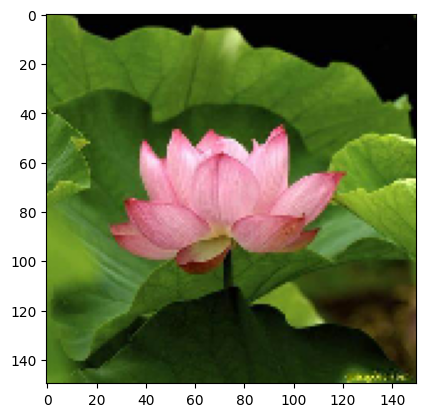

In [72]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Flower/lotus.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('lotus')
if np.argmax(model.predict(img)) == 1:
   print('Marigold')
if np.argmax(model.predict(img)) == 2:
   print('rose')
if np.argmax(model.predict(img)) == 3:
   print('sunflower')
if np.argmax(model.predict(img)) == 4:
   print('YellowApricotFlower')

1/1 [==============================] - 0s 21ms/step
Giá trị: 1
1/1 [==============================] - 0s 20ms/step
Marigold
1/1 [==============================] - 0s 17ms/step


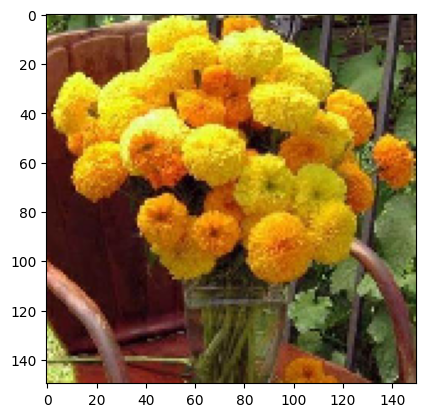

In [73]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Flower/Marigold.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('lotus')
if np.argmax(model.predict(img)) == 1:
   print('Marigold')
if np.argmax(model.predict(img)) == 2:
   print('rose')
if np.argmax(model.predict(img)) == 3:
   print('sunflower')
if np.argmax(model.predict(img)) == 4:
   print('YellowApricotFlower')

1/1 [==============================] - 0s 18ms/step
Giá trị: 2
1/1 [==============================] - 0s 18ms/step
rose
1/1 [==============================] - 0s 19ms/step


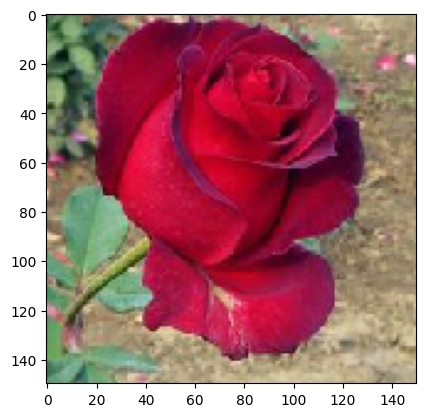

In [74]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Flower/rose.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('lotus')
if np.argmax(model.predict(img)) == 1:
   print('Marigold')
if np.argmax(model.predict(img)) == 2:
   print('rose')
if np.argmax(model.predict(img)) == 3:
   print('sunflower')
if np.argmax(model.predict(img)) == 4:
   print('YellowApricotFlower')

1/1 [==============================] - 0s 19ms/step
Giá trị: 3
1/1 [==============================] - 0s 20ms/step
sunflower
1/1 [==============================] - 0s 20ms/step


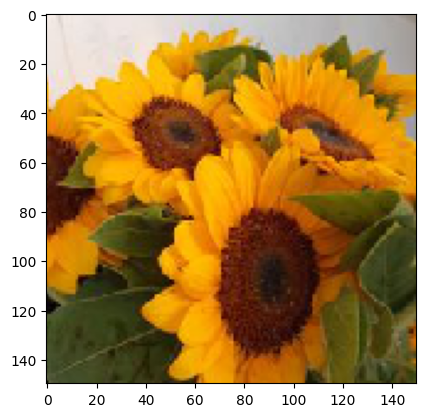

In [75]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Flower/sunflower.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('lotus')
if np.argmax(model.predict(img)) == 1:
   print('Marigold')
if np.argmax(model.predict(img)) == 2:
   print('rose')
if np.argmax(model.predict(img)) == 3:
   print('sunflower')
if np.argmax(model.predict(img)) == 4:
   print('YellowApricotFlower')

1/1 [==============================] - 0s 19ms/step
Giá trị: 4
1/1 [==============================] - 0s 17ms/step
YellowApricotFlower


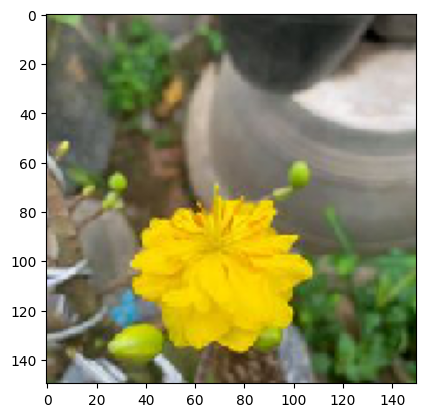

In [76]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/Flower/YellowApricotFlower.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img))
print('Giá trị:', np.argmax(model.predict(img)))
if np.argmax(model.predict(img)) == 0:
   print('lotus')
if np.argmax(model.predict(img)) == 1:
   print('Marigold')
if np.argmax(model.predict(img)) == 2:
   print('rose')
if np.argmax(model.predict(img)) == 3:
   print('sunflower')
if np.argmax(model.predict(img)) == 4:
   print('YellowApricotFlower')